In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNELS = 3

In [4]:
def read_and_preprocess(img_path):
		# reading the image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
		# resizing it to 128*128 to ensure that the images have the same size and aspect ratio. (IMAGE_SIZE is a global variable)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
		# convert its datatype so that it could be normalized
    img = np.array(img, dtype='float32') 
		# normalization (now every pixel is in the range of 0 and 1)
    img = img/255 
    return img

In [5]:
labels = ['real', 'fake']

X = [] # To store images
y = [] # To store labels

# labels -
# 0 - Real
# 1 - Fake
image_path = 'C:/Users/roshi/PycharmProjects/DEEPTRUTH/Model Creation/dataset/'

In [6]:
pip install --upgrade opencv-python


Note: you may need to restart the kernel to use updated packages.


In [7]:
for folder in os.scandir(image_path):
    for entry in os.scandir(image_path + folder.name):

        X.append(read_and_preprocess(image_path + folder.name + '/' + entry.name))
        
        if folder.name[0]=='r':
            y.append(0) # real
        else:
            y.append(1) # fake

In [8]:
X = np.array(X)
X.shape 

(1289, 128, 128, 3)

In [9]:
y = np.array(y)
y.shape

(1289,)

<BarContainer object of 2 artists>

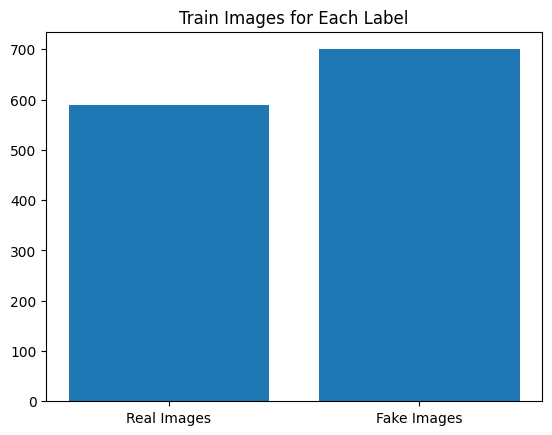

In [10]:


real_count = len(y[y==0])
fake_count = len(y[y==1])

plt.title("Train Images for Each Label")
plt.bar(["Real Images", "Fake Images"],[real_count, fake_count])





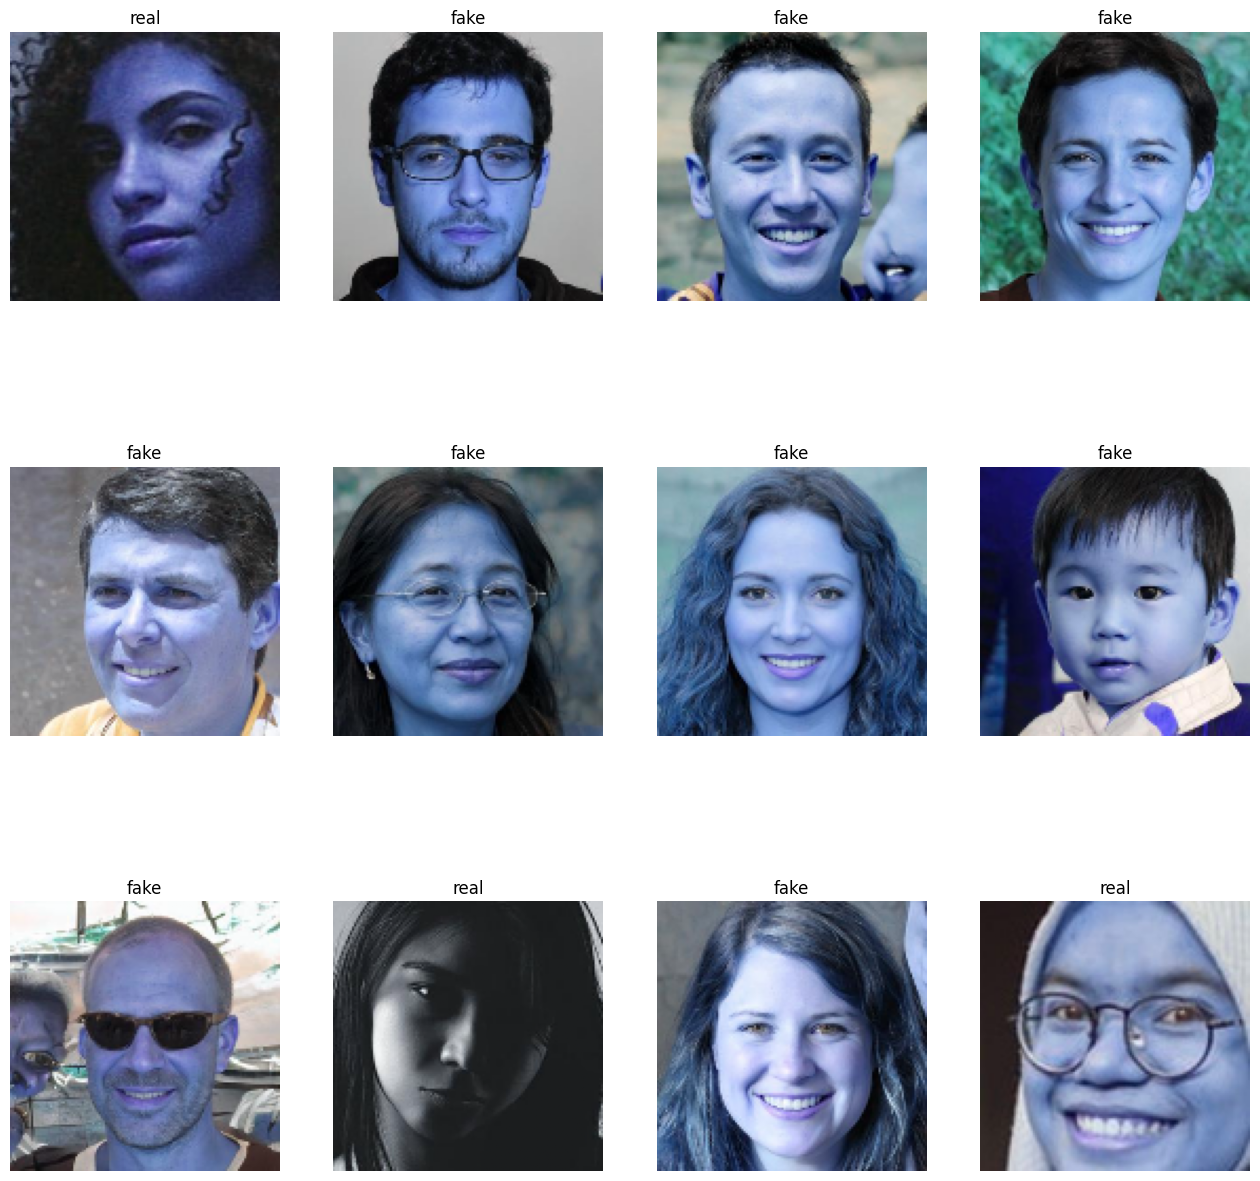

In [11]:
# plotting random images

import random

plt.figure(figsize=(16, 16))

for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.axis("off")
    img = random.randint(0, 1289)
    plt.imshow(X[img])
    plt.title(labels[y[img]])

In [12]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, 
                                                  shuffle=True, 
                                                  stratify=y, 
                                                  random_state=123)

In [14]:
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, 
                                                  test_size=0.5, 
                                                  shuffle=True, 
                                                  stratify=y_val, 
                                                  random_state=123)

In [15]:

X_train.shape

(1031, 128, 128, 3)

In [16]:

X_val.shape

(129, 128, 128, 3)

In [17]:

X_test.shape

(129, 128, 128, 3)

In [18]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=input_shape),
    MaxPooling2D((4,4)),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((3,3)),
    Dropout(0.3), # for regularization
    
    Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    
    Flatten(), # flattening for feeding into ANN
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(n_classes, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        6

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics= ["accuracy"])

In [21]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
checkpointer = ModelCheckpoint(filepath="dfd_weights_new.h5", verbose=1, save_best_only=True)

In [22]:
history = model.fit(X_train, y_train, epochs = 150, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, shuffle=True, callbacks=[earlystopping, checkpointer])

Epoch 1/150


33/33 [==============================] - ETA: 0s - loss: 0.7006 - accuracy: 0.5121
Epoch 1: val_loss improved from inf to 0.68755, saving model to dfd_weights_new.h5
33/33 [==============================] - 9s 170ms/step - loss: 0.7006 - accuracy: 0.5121 - val_loss: 0.6876 - val_accuracy: 0.5426
Epoch 2/150


C:\Users\roshi\PycharmProjects\DEEPTRUTH\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.5393
Epoch 2: val_loss did not improve from 0.68755
33/33 [==============================] - 5s 158ms/step - loss: 0.6940 - accuracy: 0.5393 - val_loss: 0.6922 - val_accuracy: 0.5426
Epoch 3/150
32/33 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5479
Epoch 3: val_loss did not improve from 0.68755
33/33 [==============================] - 5s 148ms/step - loss: 0.6917 - accuracy: 0.5470 - val_loss: 0.6899 - val_accuracy: 0.5426
Epoch 4/150
33/33 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5432
Epoch 4: val_loss did not improve from 0.68755
33/33 [==============================] - 5s 154ms/step - loss: 0.6903 - accuracy: 0.5432 - val_loss: 0.6893 - val_accuracy: 0.5426
Epoch 5/150
33/33 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5432
Epoch 5: val_loss did not improve from 0.68755
33/33 [==============================] - 4s 136ms/s

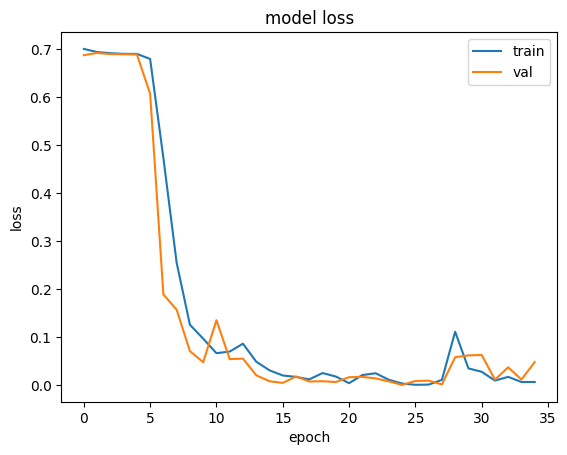

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

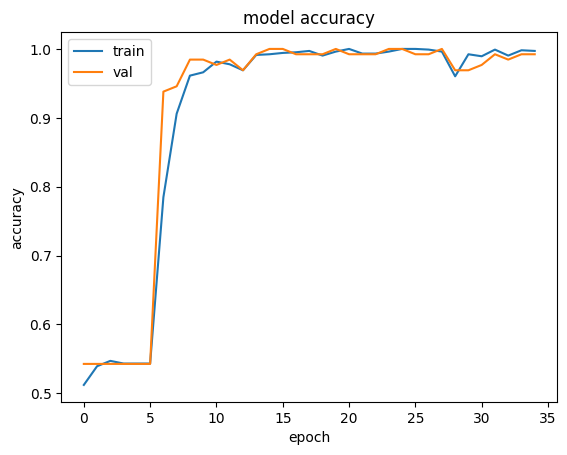

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
model_json = model.to_json()
with open("dfd_model_new.json","w") as json_file:
  json_file.write(model_json)

In [26]:
with open('dfd_model_new.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model weights  
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('dfd_weights_new.h5')
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics= ["accuracy"])

In [27]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 26ms/step


In [28]:
predict = []

for i in predictions:
  predict.append(np.argmax(i))

predict = np.asarray(predict)

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predict)
accuracy

1.0

<Axes: >

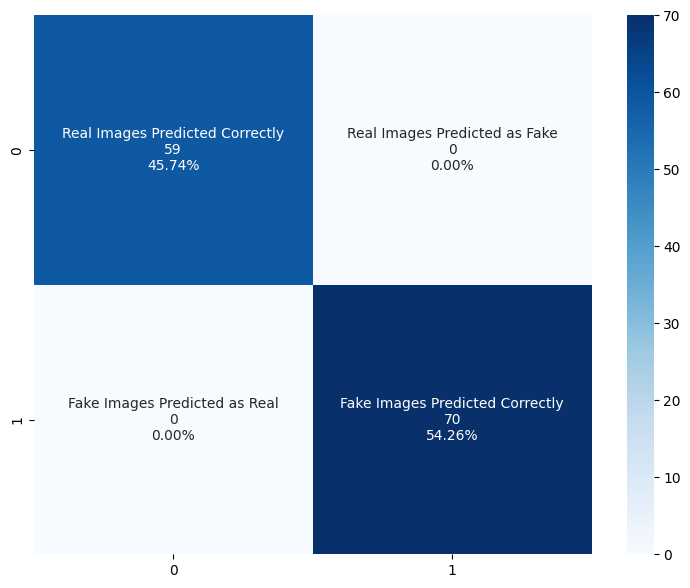

In [30]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, predict)
plt.figure(figsize = (9,7))

group_names = ['Real Images Predicted Correctly','Real Images Predicted as Fake','Fake Images Predicted as Real','Fake Images Predicted Correctly']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        70

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129

